# Portfolio Optimization Using Pair Trading of Stocks

1) All the **stock prices** are taken from automotive sector of NSE, India.
   
   **The training data** consist of closing price of stocks from Yahoo Finance for the period 1st July 2021 to 30th June 2024.

   The **evaluation**is done based on the annual returns of the stocks on the test data from 1st July 2024 to 30th June 2025.

3) **Correlation coefficients** are computed based on the return values of the close prices.

4) To identify the pairs which are **cointegrated**, the coint function defined in the stattools submodule under the statsmodels module of Python is      used.

   The cointegrated pair of **M&M.NS and ASHOKLEY.NS** is used.

6) An **ordinary least square (OLS)** regression model is built to get hedge ratio and and the p-value of its t-statistics.

7) A dataframe is created which includes **signals for buying and selling** of stocks based on z-score.

8) The pair trading portfolio is initiated on 1st July 2024, with an **initial capital of 100000 units** for each asset (i.e., with a total investment    of 200000 units).

   At the end of 30 June 2025 the excess (or deficit) of the total portfolio value over the total initial investment of 200000 units is computed to       arrive at the **profit (or loss).**

   Based on the computed profit (or loss), the **return of the portfolio** is derived. 

In [101]:
# make the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
idx = pd.IndexSlice
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Identification of Cointegrated Pairs of Stocks

In [102]:
prices = pd.read_csv('auto.csv', index_col=['date'])
prices.head(10)

,MARUTI.NS,TATAMOTORS.NS,M&M.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,BALKRISIND.NS,BHARATFORG.NS,ASHOKLEY.NS,TIINDIA.NS
date,,,,,,,,,,
7/1/2021,7584.399902,344.250000,779.450012,4204.549805,2675.300049,2922.500000,2274.899902,765.650024,61.224998,1181.449951
7/2/2021,7573.850098,344.899994,782.599976,4175.350098,2661.000000,2919.850098,2298.850098,771.900024,61.224998,1175.650024
7/5/2021,7599.450195,346.100006,791.750000,4201.500000,2701.050049,2938.050049,2292.550049,770.900024,62.450001,1132.699951
7/6/2021,7514.950195,316.899994,781.900024,4195.399902,2711.149902,2919.250000,2303.250000,767.349976,61.099998,1117.949951
7/7/2021,7449.399902,317.100006,778.900024,4188.250000,2710.850098,2913.350098,2291.300049,806.299988,61.775002,1103.599976
7/8/2021,7401.200195,306.350006,776.250000,4077.300049,2729.300049,2900.399902,2292.600098,808.950012,62.000000,1097.699951
7/9/2021,7425.700195,306.299988,771.549988,3995.899902,2712.149902,2896.800049,2280.199951,808.000000,62.450001,1090.750000
7/12/2021,7470.100098,307.450012,772.849976,3956.149902,2709.500000,2898.199951,2308.899902,806.250000,62.950001,1098.150024
7/13/2021,7430.350098,310.950012,781.150024,3966.100098,2706.699951,2904.100098,2306.250000,820.250000,63.500000,1133.550049


In [103]:
# train test split 
train_close, test_close = train_test_split(prices, test_size=0.251012, shuffle=False)

In [104]:
# quick view of head and tail of train set
train_close.head(3)

,MARUTI.NS,TATAMOTORS.NS,M&M.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,BALKRISIND.NS,BHARATFORG.NS,ASHOKLEY.NS,TIINDIA.NS
date,,,,,,,,,,
7/1/2021,7584.399902,344.250000,779.450012,4204.549805,2675.300049,2922.500000,2274.899902,765.650024,61.224998,1181.449951
7/2/2021,7573.850098,344.899994,782.599976,4175.350098,2661.000000,2919.850098,2298.850098,771.900024,61.224998,1175.650024
7/5/2021,7599.450195,346.100006,791.750000,4201.500000,2701.050049,2938.050049,2292.550049,770.900024,62.450001,1132.699951


In [105]:
train_close.tail(2)

,MARUTI.NS,TATAMOTORS.NS,M&M.NS,BAJAJ-AUTO.NS,EICHERMOT.NS,HEROMOTOCO.NS,BALKRISIND.NS,BHARATFORG.NS,ASHOKLEY.NS,TIINDIA.NS
date,,,,,,,,,,
6/27/2024,12178.75000,972.099976,2888.949951,9417.450195,4713.799805,5485.200195,3199.75,1680.550049,121.080002,4203.799805
6/28/2024,12033.84961,989.750000,2866.649902,9501.650391,4672.950195,5579.600098,3229.00,1670.349976,120.945000,4259.250000


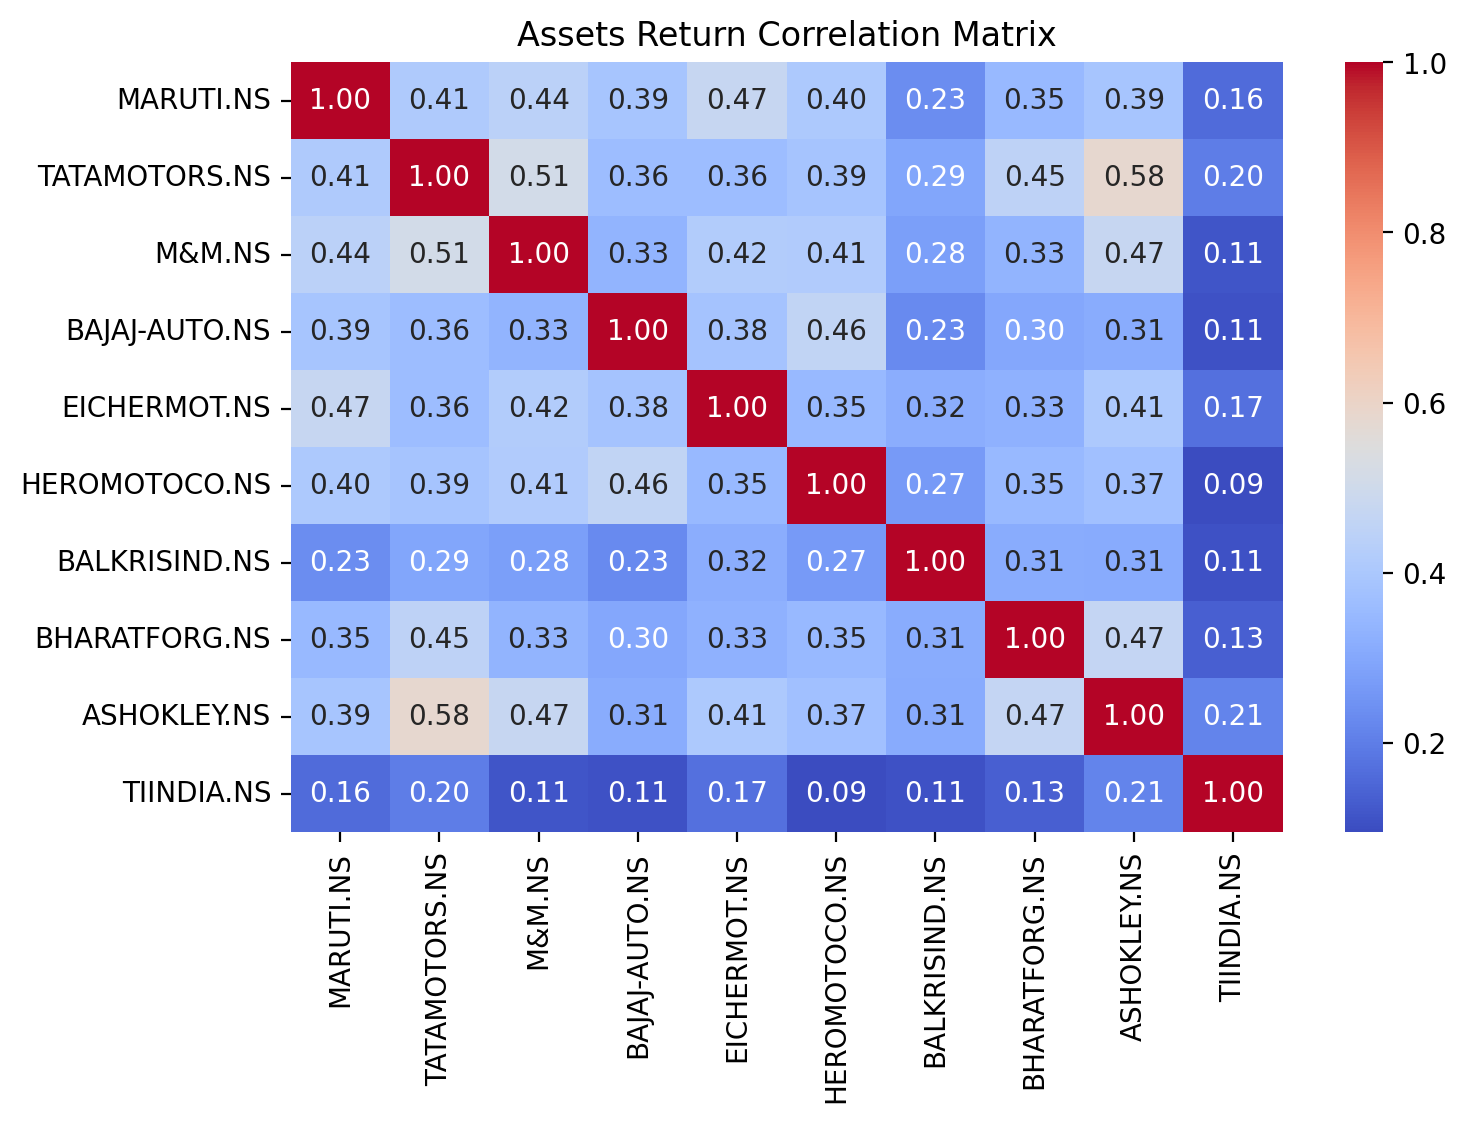

In [106]:
# Pearson correlation
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f") #spearman
ax.set_title('Assets Return Correlation Matrix')
plt.savefig('Assets Return Correlation Matrix', dpi=400)

In [107]:
# function to find cointegrated pairs
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('MARUTI.NS', 'ASHOKLEY.NS'), ('TATAMOTORS.NS', 'BHARATFORG.NS'), ('M&M.NS', 'ASHOKLEY.NS'), ('EICHERMOT.NS', 'TIINDIA.NS')]


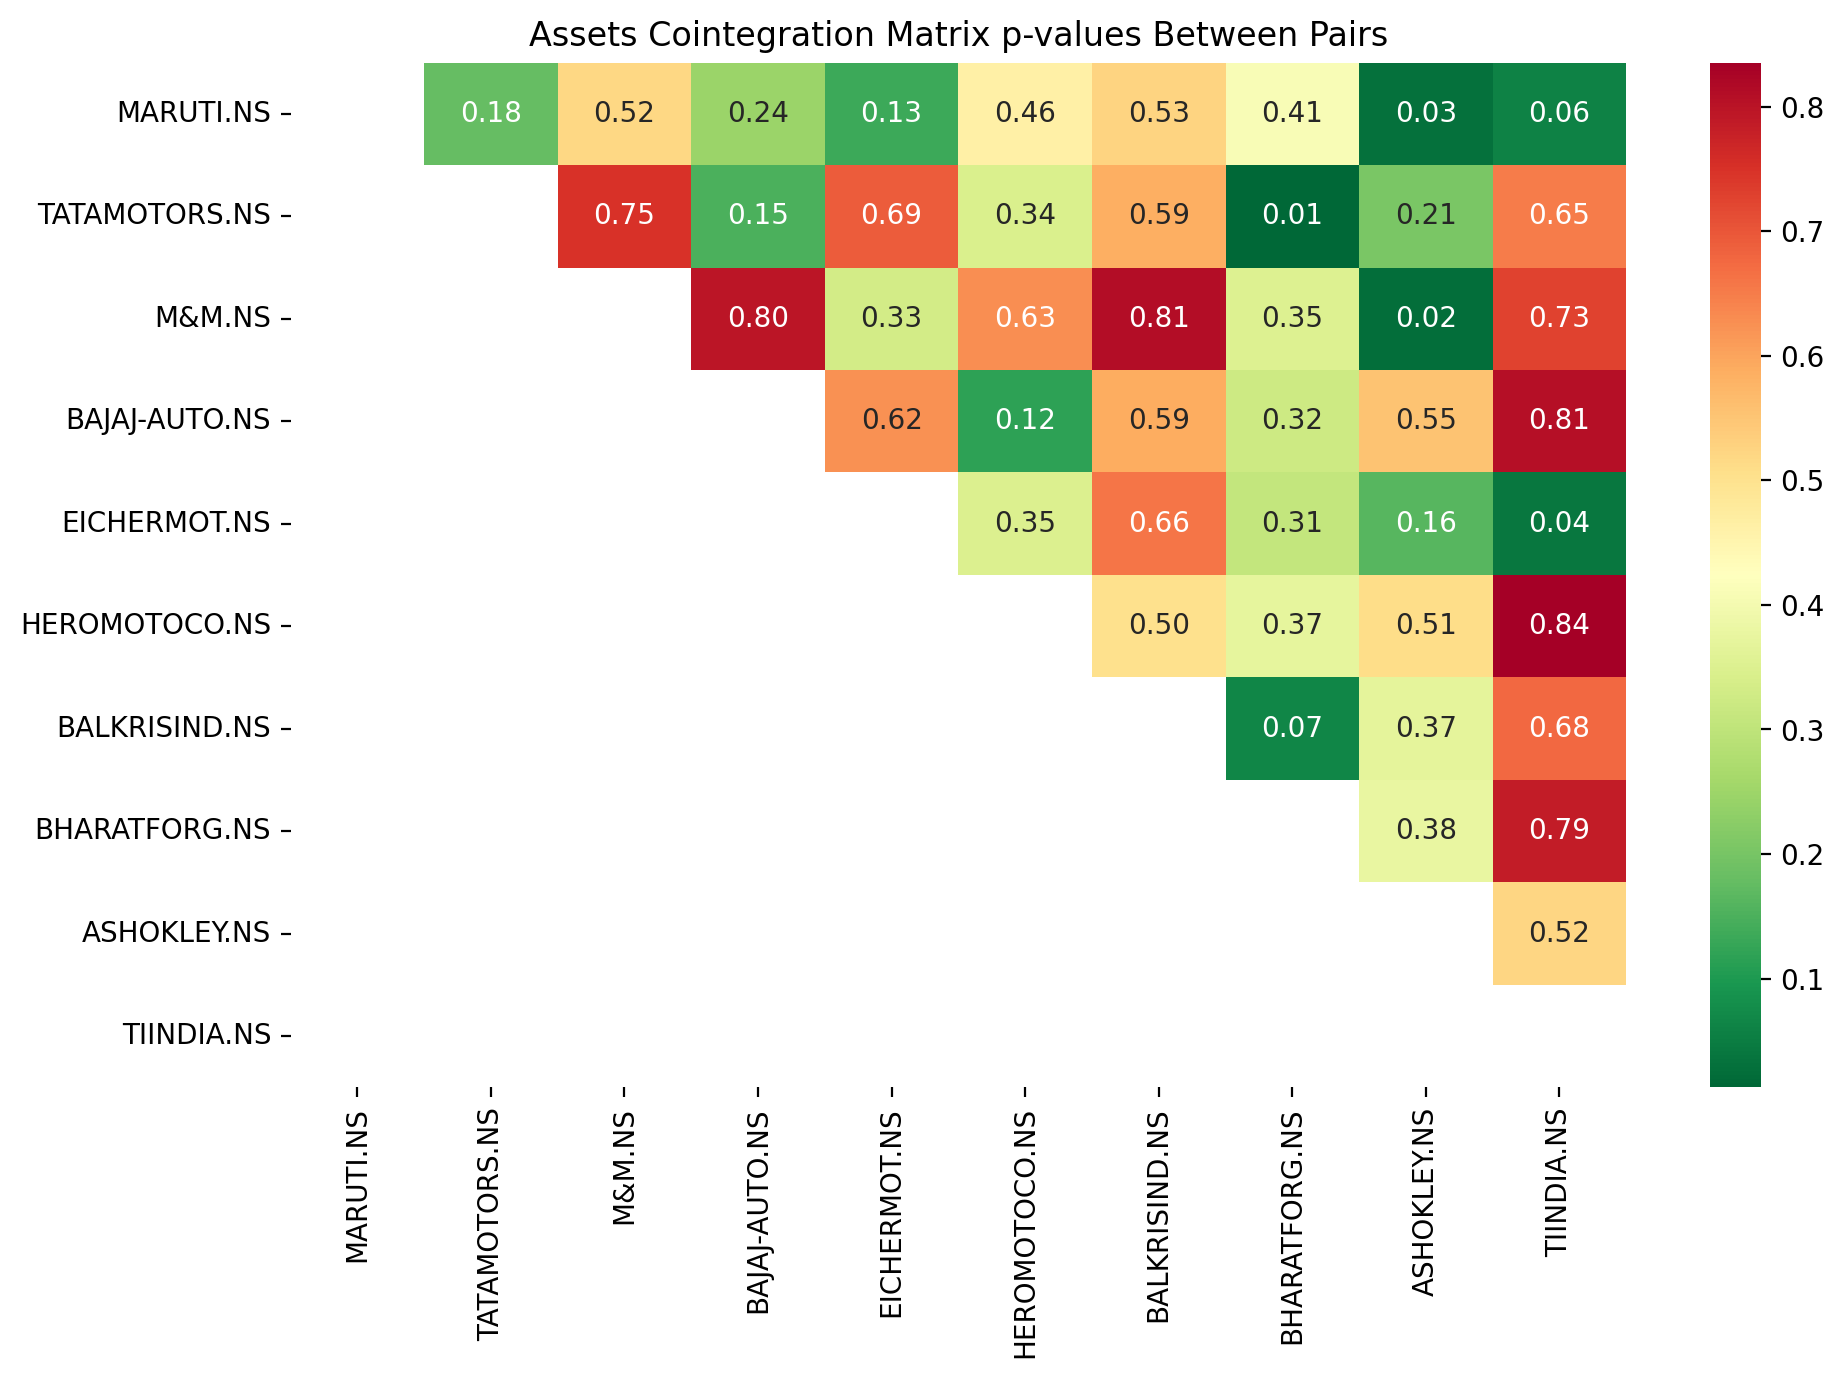

In [108]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(pvalues, xticklabels = train_close.columns,
                yticklabels = train_close.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointegration Matrix p-values Between Pairs')
plt.tight_layout()
plt.savefig('Assets Cointegration Matrix p-values Between Pairs', dpi=400)

### Perform a Cointegration test for the Selected Pair

In [109]:
# final pair to test strategy
asset1 = 'M&M.NS'
asset2 = 'ASHOKLEY.NS'

In [110]:
# create a train dataframe of 2 assets
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]

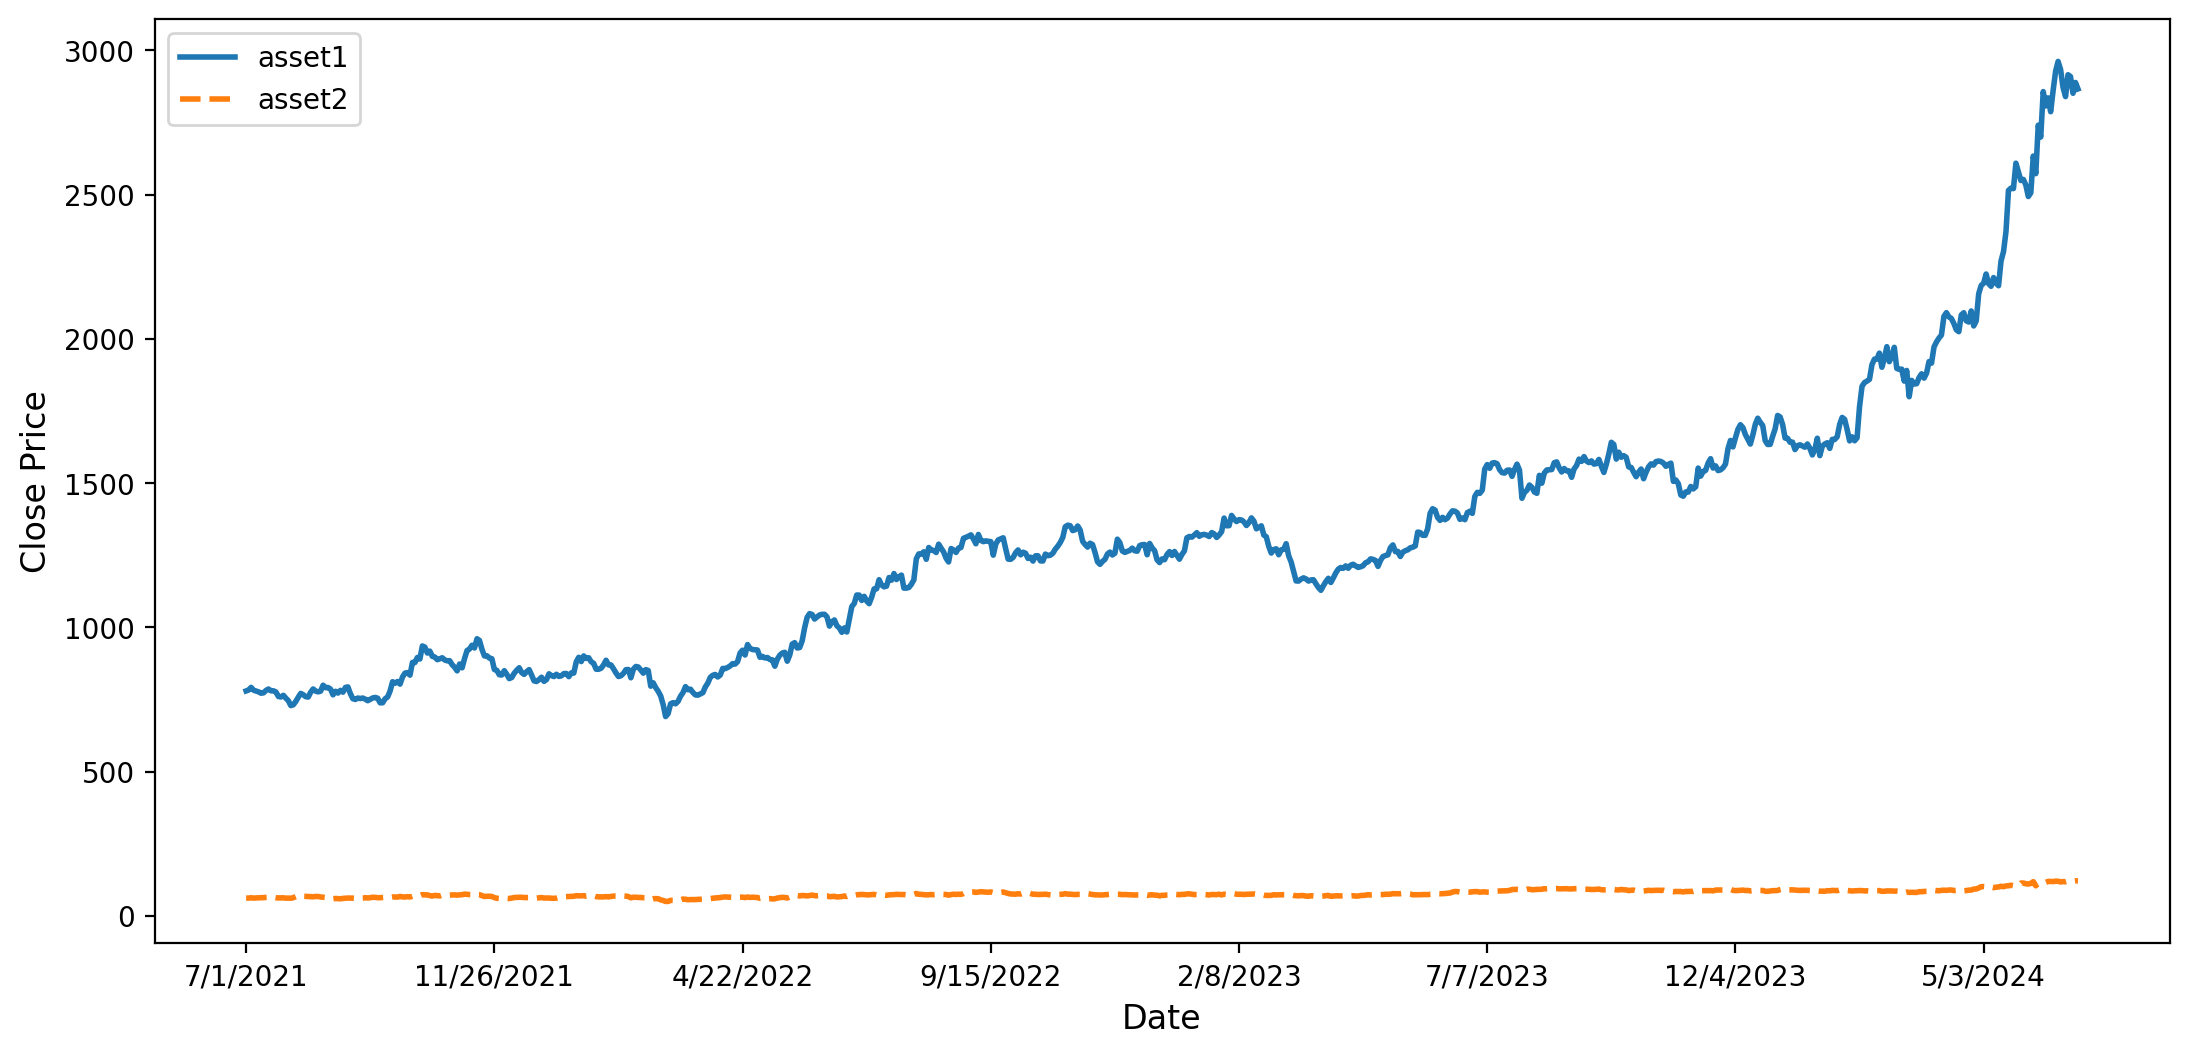

In [111]:
from matplotlib.dates import DateFormatter
# visualize closing prices
ax = train[['asset1']].plot(figsize=(13, 6), linewidth=2,linestyle='solid', label = "asset1")
plt.plot(train[['asset2']], linewidth=2, linestyle='dashed', label = "asset2")
ax.set_ylabel("Close Price", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.legend()
plt.savefig('Close prices', dpi=400)

In [112]:
# run OLS regression
model=sm.OLS(train.asset2, train.asset1).fit()

In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 asset2   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                          2.012e+04
Date:                Fri, 08 Aug 2025   Prob (F-statistic):                        0.00
Time:                        20:24:15   Log-Likelihood:                         -3030.2
No. Observations:                 739   AIC:                                      6062.
Df Residuals:                     738   BIC:                                      6067.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
asset1         0.0549      0.000    141.855      0.000       0.054       0.056
==============================================================================
Omnibus:                      148.034   Durbin-Watson:                   0.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.291
Skew:                          -1.220   Prob(JB):                     1.35e-56
Kurtosis:                       4.550   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

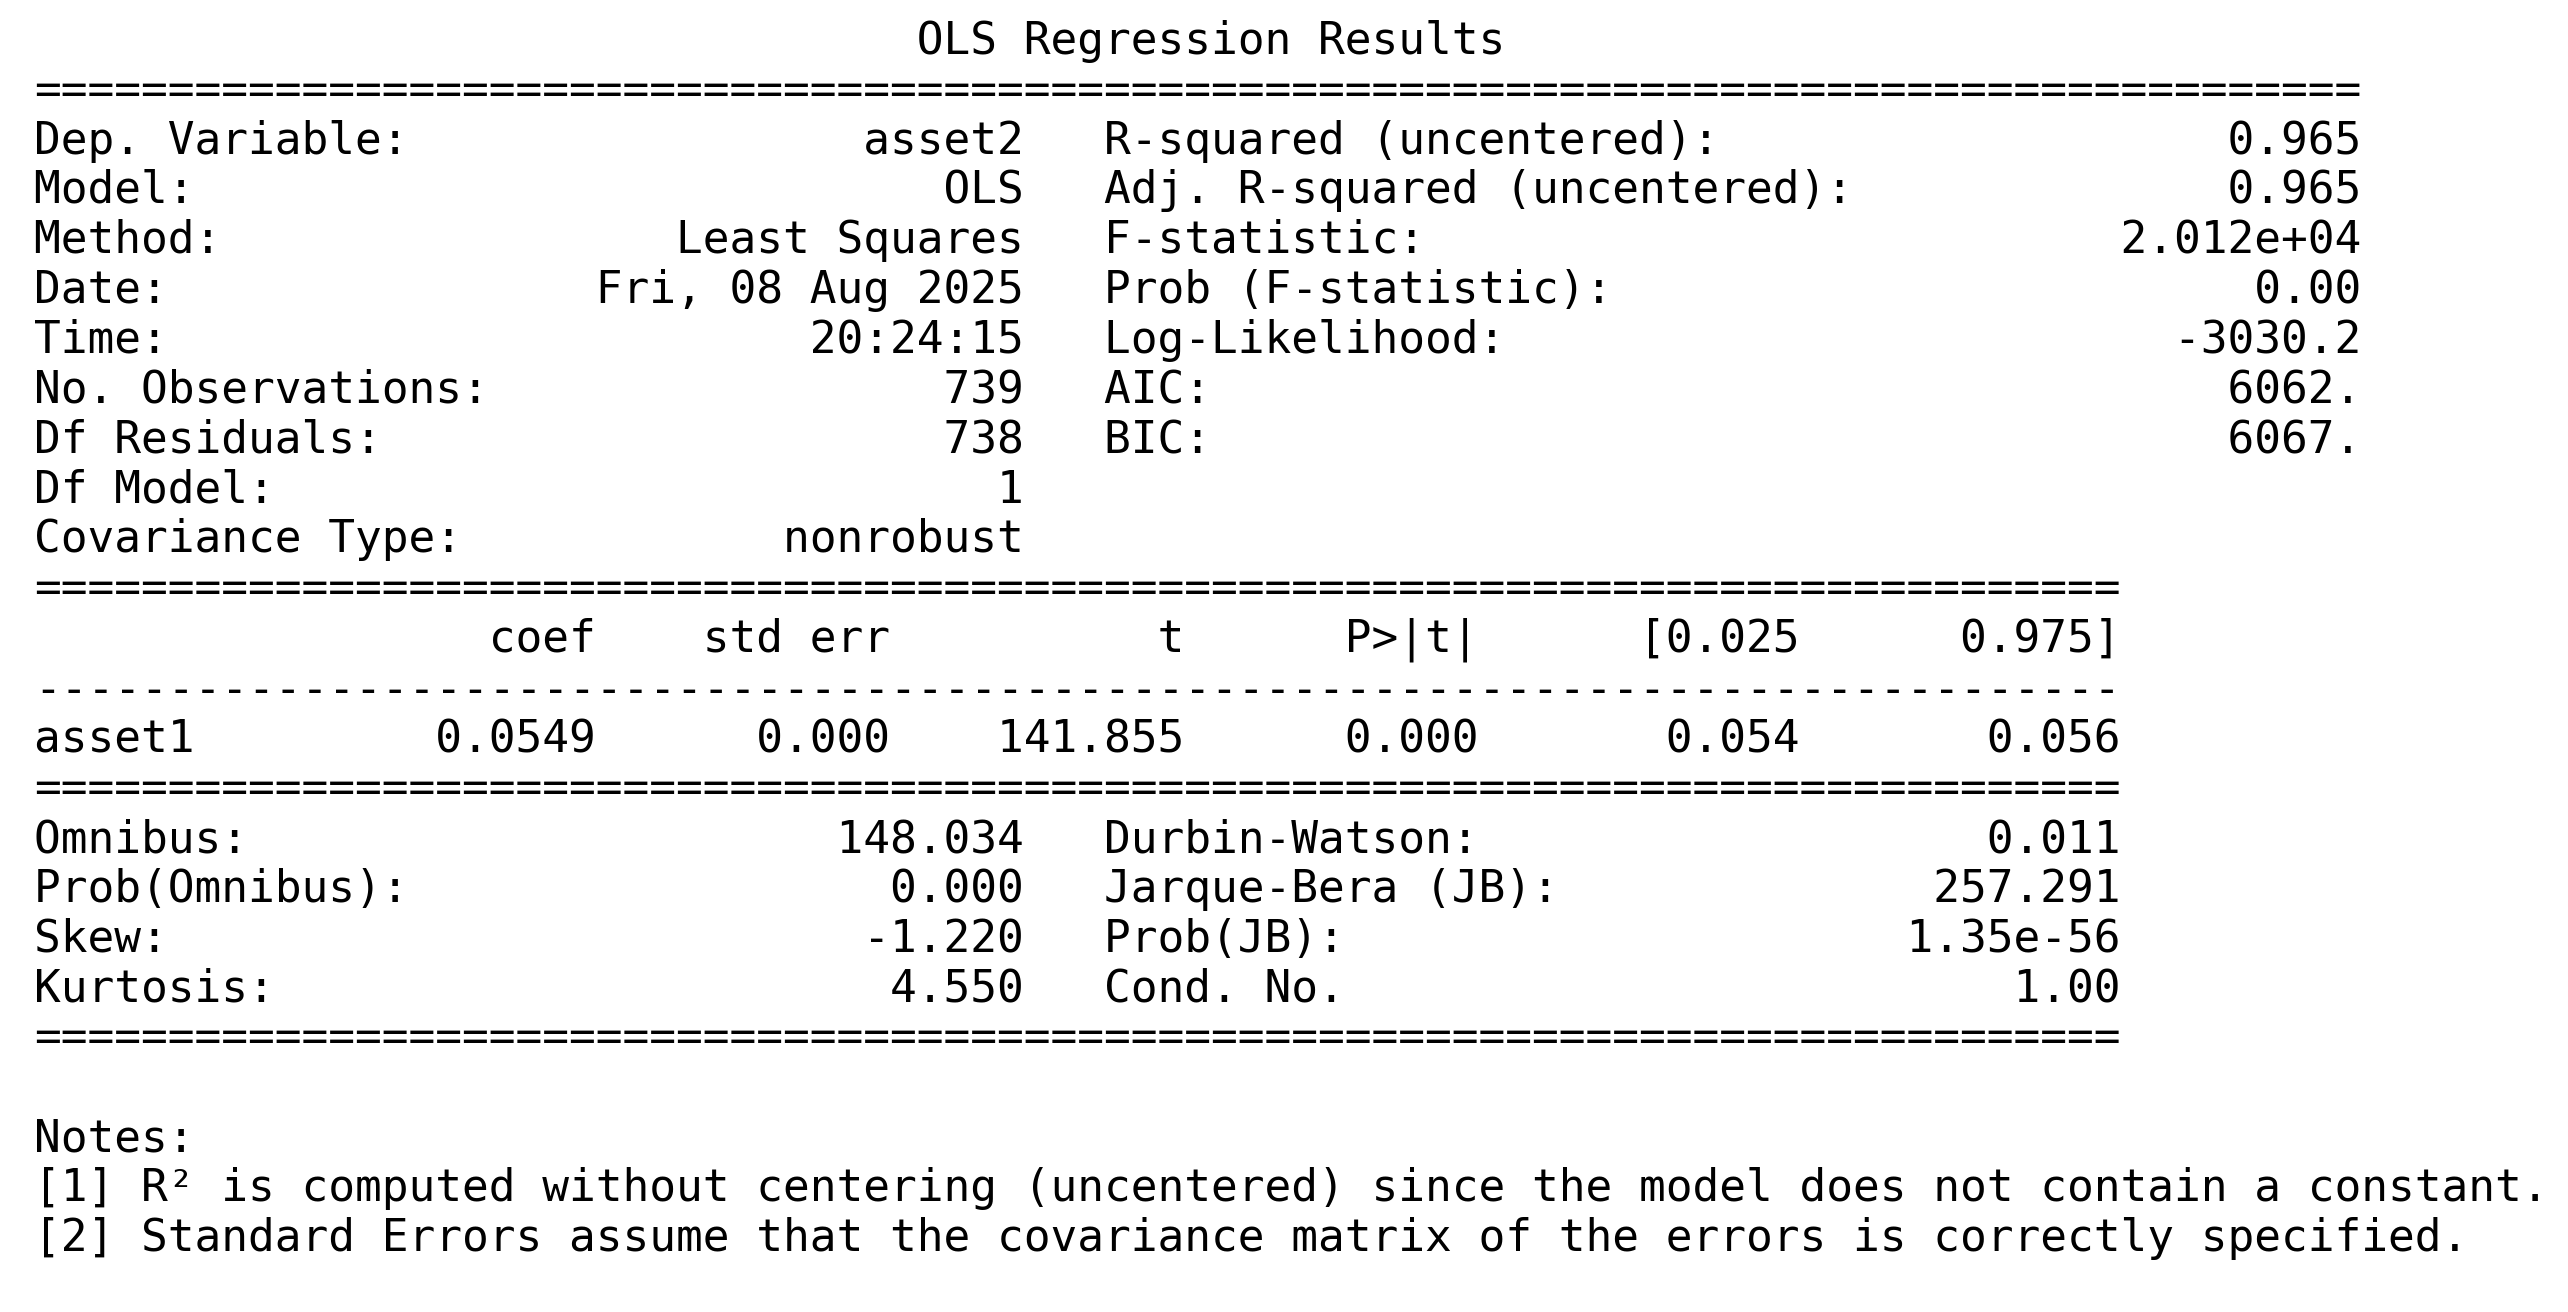

In [114]:
# print regression summary results
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 16}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.7, bottom=0.1)

In [115]:
import warnings
warnings.filterwarnings("ignore")

In [116]:
model.params[0]

np.float64(0.05491370619195206)

In [117]:
print('Hedge Ratio = ', model.params[0])

Hedge Ratio =  0.05491370619195206


In [118]:
# calculate residual
residual = train.asset2 - model.params[0] * train.asset1 # residual of the OLS model

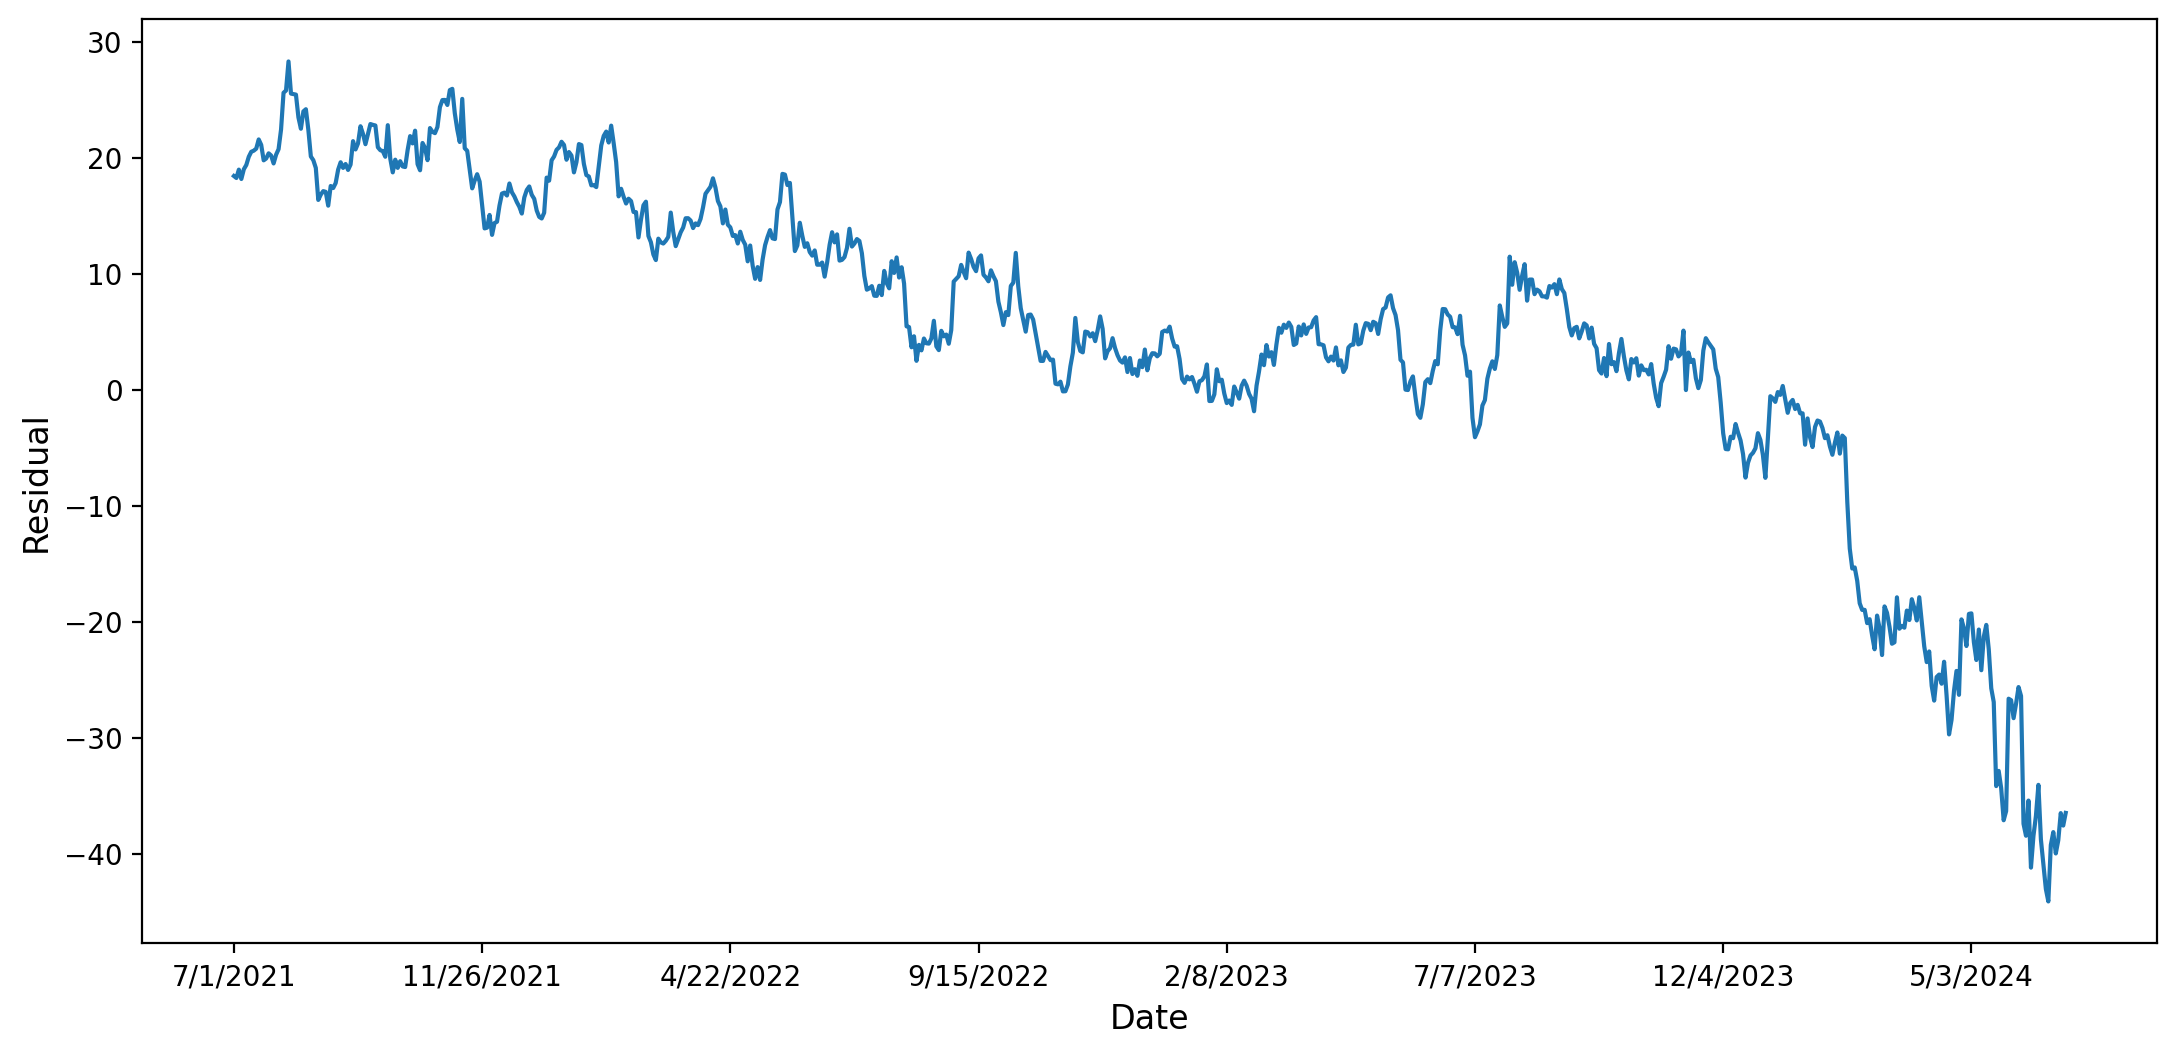

In [119]:
# Plot the residual
ax = residual.plot(figsize=(13, 6))
ax.set_ylabel("Residual", fontsize=12)
ax.set_xlabel("Date", fontsize=12)
plt.savefig('Residual Plot', dpi=400)

In [120]:
# conduct Augmented Dickey-Fuller test
adf = adfuller(residual, maxlag = 1)
adf

(np.float64(-0.048885139168060095),
 np.float64(0.9542977168479128),
 1,
 737,
 {'1%': np.float64(-3.4392539652094154),
  '5%': np.float64(-2.86546960465041),
  '10%': np.float64(-2.5688625527782327)},
 np.float64(2735.1746560956085))

In [121]:
print('Test Statistic = ', adf[0])

Test Statistic =  -0.048885139168060095


In [122]:
# probablity critical values
print(adf[4])

{'1%': np.float64(-3.4392539652094154), '5%': np.float64(-2.86546960465041), '10%': np.float64(-2.5688625527782327)}


### Generate Trading Signals using z-scores of the ratios 

In [123]:
# calculate z-score
def zscore(series):
    return (series - series.mean()) / np.std(series)

In [124]:
# create a dataframe for trading signals
signals = pd.DataFrame()
signals['asset1'] = test_close[asset1] 
signals['asset2'] = test_close[asset2]
ratios = signals.asset1 / signals.asset2

In [125]:
signals.head()

,asset1,asset2
date,,
7/1/2024,2875.850098,119.389999
7/2/2024,2865.149902,117.260002
7/3/2024,2877.949951,114.735001
7/4/2024,2902.800049,113.555000
7/5/2024,2880.600098,114.779999


In [126]:
# calculate z-score and define upper and lower thresholds
signals['z'] = zscore(ratios)
signals['z upper limit'] = np.mean(signals['z']) + np.std(signals['z'])
signals['z lower limit'] = np.mean(signals['z']) - np.std(signals['z'])

In [127]:
signals.head()

,asset1,asset2,z,z upper limit,z lower limit
date,,,,,
7/1/2024,2875.850098,119.389999,-0.789797,1.0,-1.0
7/2/2024,2865.149902,117.260002,-0.620872,1.0,-1.0
7/3/2024,2877.949951,114.735001,-0.304146,1.0,-1.0
7/4/2024,2902.800049,113.555000,-0.070249,1.0,-1.0
7/5/2024,2880.600098,114.779999,-0.297680,1.0,-1.0


In [128]:
# create signal - short if z-score is greater than upper limit else long
signals['signals1'] = 0
signals['signals1'] = np.select([signals['z'] > \
                                 signals['z upper limit'], signals['z'] < signals['z lower limit']], [-1, 1], default=0)

In [129]:
# we take the first order difference to obtain portfolio position for stock
signals['positions1'] = signals['signals1'].diff()
signals['signals2'] = -signals['signals1']
signals['positions2'] = signals['signals2'].diff()

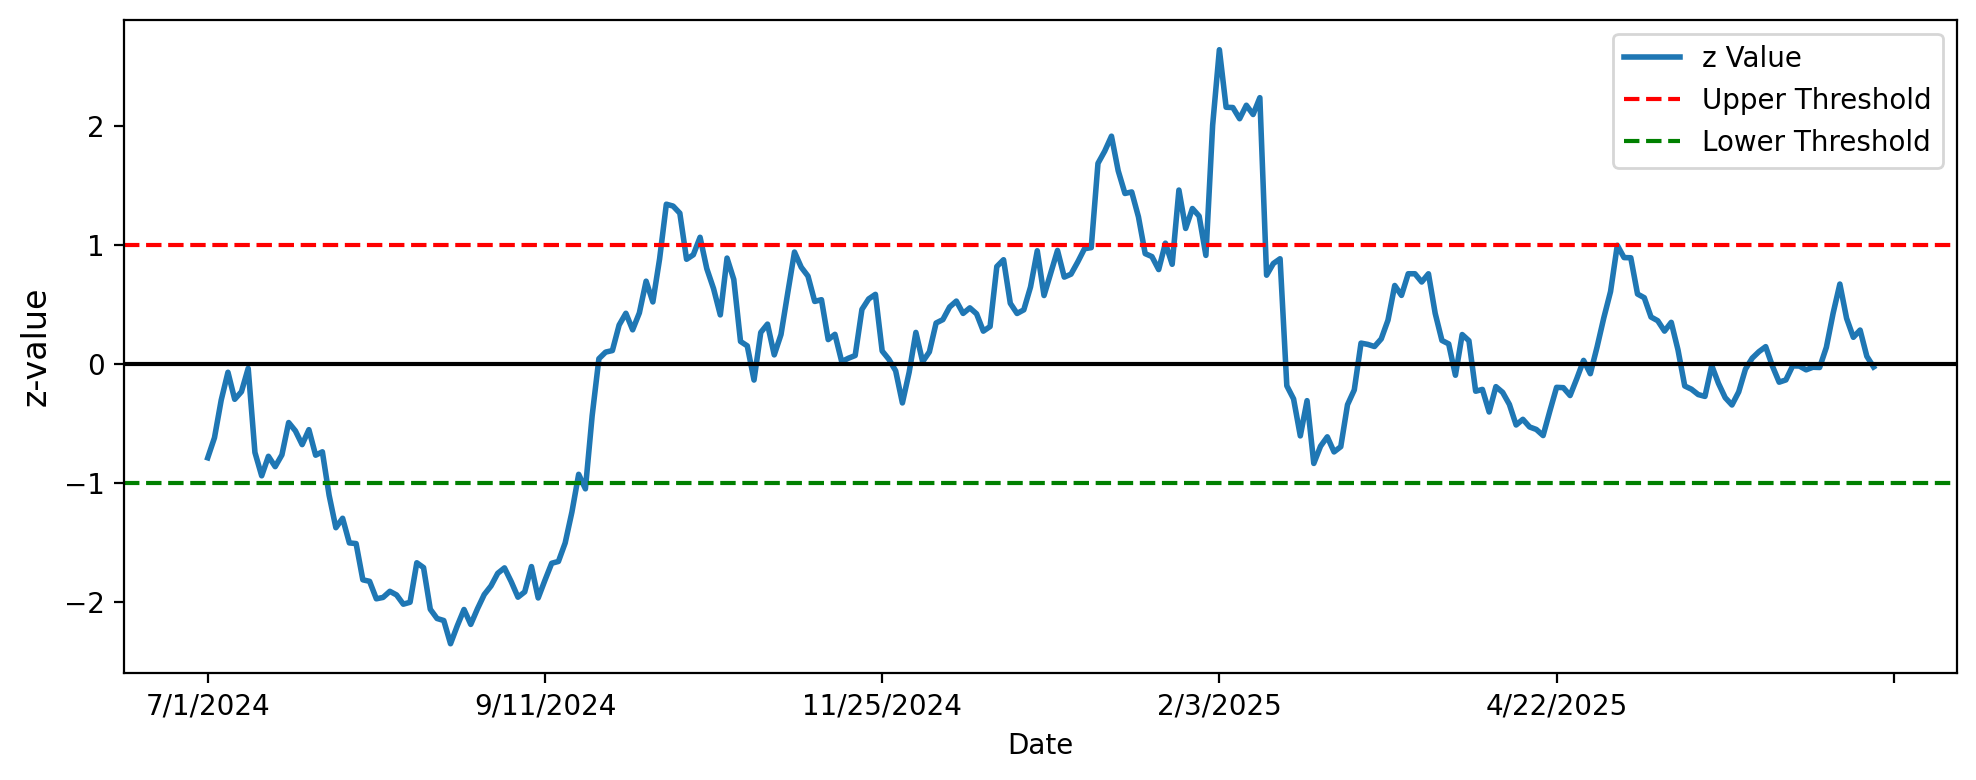

In [130]:
# # visualize z-score and upper and lower thresholds   
signals['z'].plot(label="z Value", figsize=(10, 4), linewidth=2)
#plt.title("Z-score Evaluation")
plt.ylabel("z-value", fontsize=12)
plt.xlabel("Date")
plt.axhline(signals['z'].mean(),linestyle= 'solid', color="black")
plt.axhline(signals['z upper limit'].mean(), linestyle= 'dashed',color="red", label="Upper Threshold")
plt.axhline(signals['z lower limit'].mean(), linestyle = 'dashed', color="green", label="Lower Threshold")
plt.legend()
plt.tight_layout()
plt.savefig('z-score behaviour', dpi=400)

In [131]:
# verify dataframe head and tail
signals.head(3)

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
date,,,,,,,,,
7/1/2024,2875.850098,119.389999,-0.789797,1.0,-1.0,0,NaN,0,NaN
7/2/2024,2865.149902,117.260002,-0.620872,1.0,-1.0,0,0.0,0,0.0
7/3/2024,2877.949951,114.735001,-0.304146,1.0,-1.0,0,0.0,0,0.0


In [132]:
# # check portfolio position
signals[signals.signals1 != 0].head(10)

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
date,,,,,,,,,
7/26/2024,2887.800049,123.190002,-1.104931,1.0,-1.0,1,1.0,-1,-1.0
7/29/2024,2933.000000,128.175003,-1.377643,1.0,-1.0,1,0.0,-1,0.0
7/30/2024,2922.100098,126.794998,-1.298089,1.0,-1.0,1,0.0,-1,0.0
7/31/2024,2907.800049,128.544998,-1.505400,1.0,-1.0,1,0.0,-1,0.0
8/1/2024,2828.399902,125.099998,-1.511137,1.0,-1.0,1,0.0,-1,0.0
8/2/2024,2749.649902,125.074997,-1.816064,1.0,-1.0,1,0.0,-1,0.0
8/5/2024,2678.949951,122.000000,-1.828456,1.0,-1.0,1,0.0,-1,0.0
8/6/2024,2632.949951,121.574997,-1.975580,1.0,-1.0,1,0.0,-1,0.0
8/7/2024,2680.850098,123.650002,-1.963895,1.0,-1.0,1,0.0,-1,0.0


In [133]:
signals[signals.positions1 != 0].head()

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
date,,,,,,,,,
7/1/2024,2875.850098,119.389999,-0.789797,1.0,-1.0,0,NaN,0,NaN
7/26/2024,2887.800049,123.190002,-1.104931,1.0,-1.0,1,1.0,-1,-1.0
9/18/2024,2808.199951,117.974998,-0.928585,1.0,-1.0,0,-1.0,0,1.0
9/19/2024,2797.500000,118.775002,-1.050737,1.0,-1.0,1,1.0,-1,-1.0
9/20/2024,2950.850098,118.925003,-0.436221,1.0,-1.0,0,-1.0,0,1.0


In [134]:
signals.loc[signals['positions1'] == 1].index
signals['asset1'][signals['positions1'] == 1].value_counts()

asset1
2887.800049    1
2797.500000    1
3134.350098    1
3068.000000    1
2888.100098    1
2801.399902    1
2989.850098    1
2987.199951    1
Name: count, dtype: int64

In [135]:
signals

,asset1,asset2,z,z upper limit,z lower limit,signals1,positions1,signals2,positions2
date,,,,,,,,,
7/1/2024,2875.850098,119.389999,-0.789797,1.0,-1.0,0,NaN,0,NaN
7/2/2024,2865.149902,117.260002,-0.620872,1.0,-1.0,0,0.0,0,0.0
7/3/2024,2877.949951,114.735001,-0.304146,1.0,-1.0,0,0.0,0,0.0
7/4/2024,2902.800049,113.555000,-0.070249,1.0,-1.0,0,0.0,0,0.0
7/5/2024,2880.600098,114.779999,-0.297680,1.0,-1.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
6/23/2025,3135.000000,118.334999,0.383233,1.0,-1.0,0,0.0,0,0.0
6/24/2025,3150.100098,120.389999,0.223824,1.0,-1.0,0,0.0,0,0.0
6/25/2025,3215.500000,122.305000,0.284817,1.0,-1.0,0,0.0,0,0.0


In [136]:
signals = signals.reset_index()

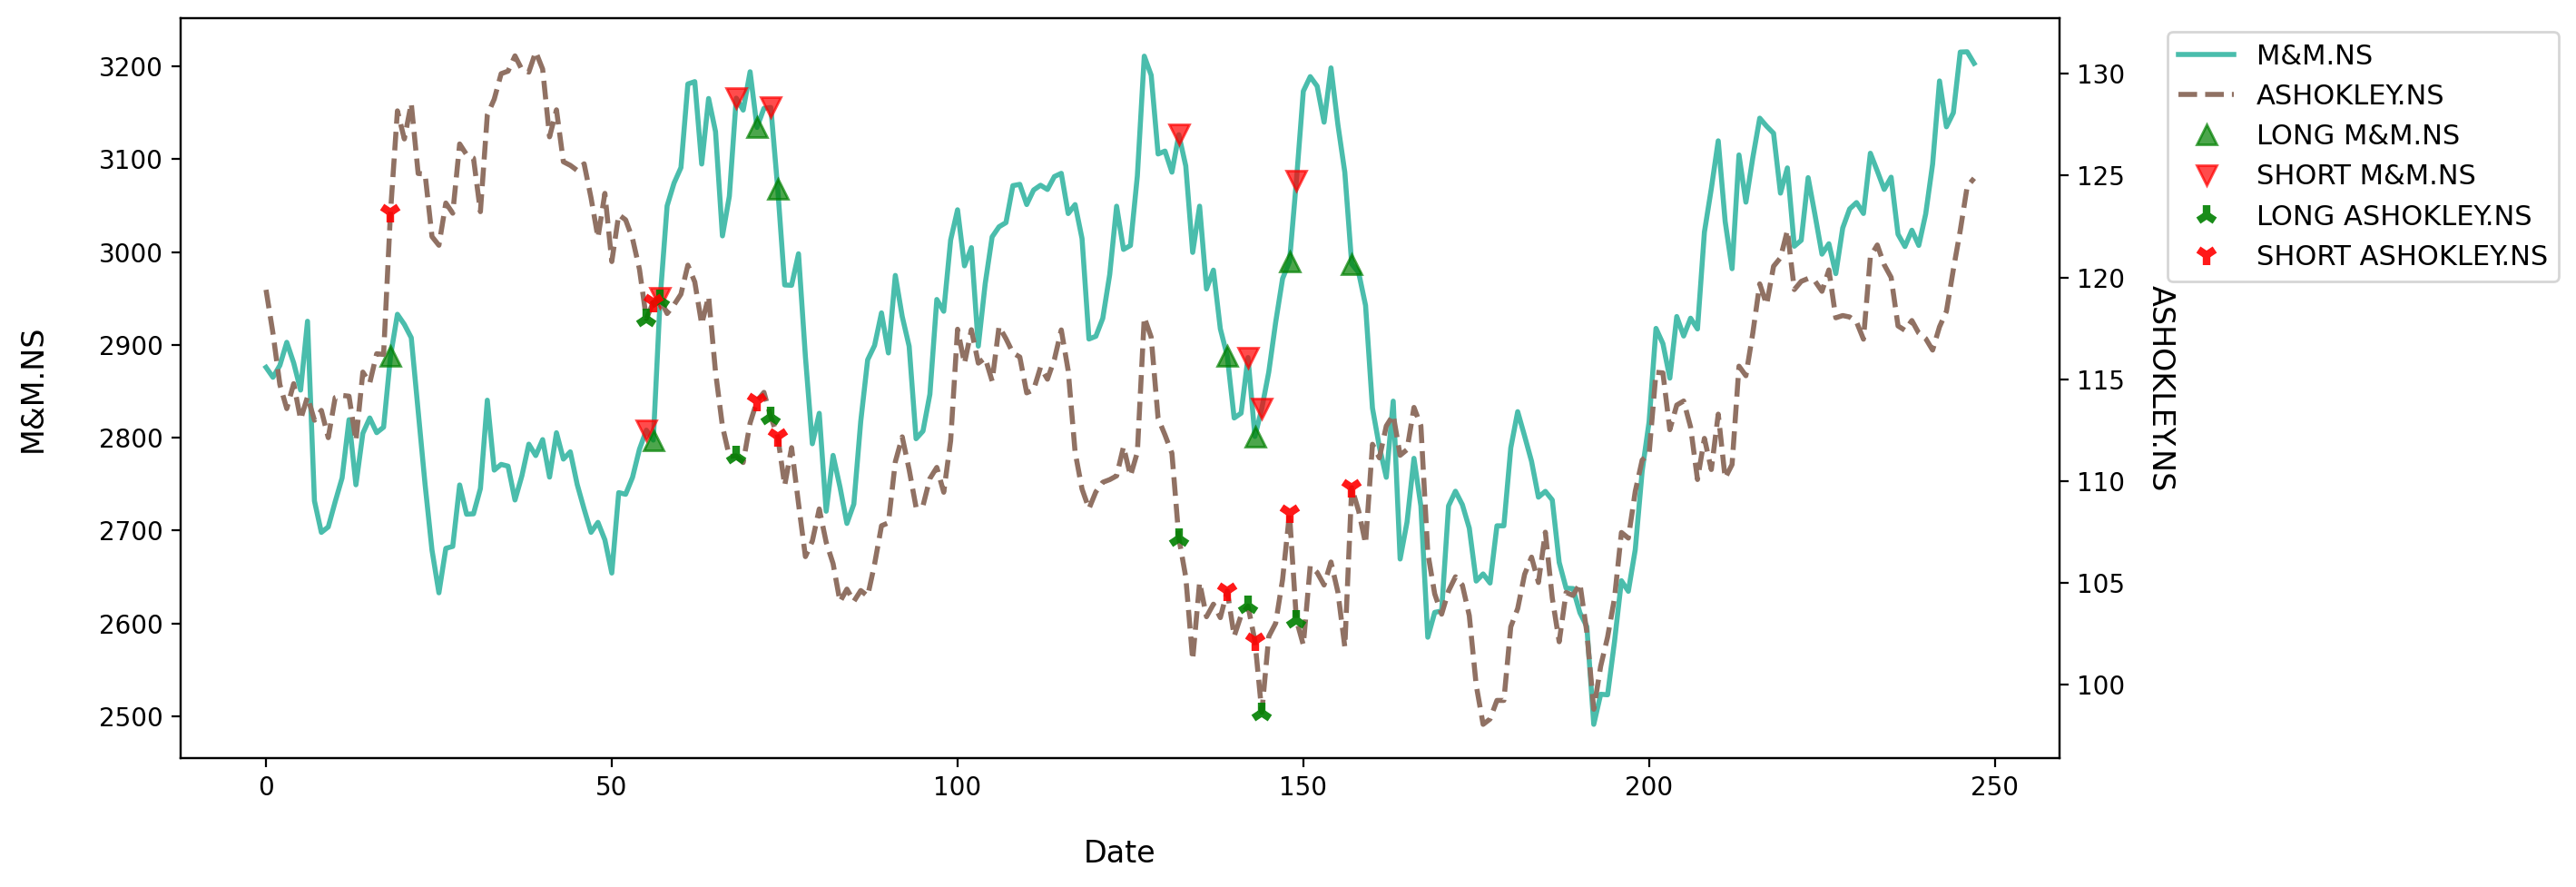

In [137]:
# visualize trading signals and position
fig = plt.figure(figsize=(17, 5))
bx = fig.add_subplot(111)
bx2 = bx.twinx()

# plot two different assets
l1, = bx.plot(signals['asset1'], c='#4abdac', linestyle='solid', linewidth=2)
l2, = bx2.plot(signals['asset2'], c='#907163', linestyle='dashed', linewidth=2)

u1, = bx.plot(signals['asset1'][signals['positions1'] == 1], lw=0, 
              marker='^', markersize=8, c='g', alpha=0.7)

d1, = bx.plot(signals['asset1'][signals['positions1'] == -1], lw=0,
              marker='v', markersize=8, c='r', alpha=0.7)

u2, = bx2.plot(signals['asset2'][signals['positions2'] == 1], lw=0,
               marker='2', markersize=8, c='g', alpha=0.9, markeredgewidth=3)

d2, = bx2.plot(signals['asset2'][signals['positions2'] == -1], lw=0,
               marker='1', markersize=8, c='r', alpha=0.9, markeredgewidth=3)

# axis labels
bx.set_ylabel(asset1, fontsize=12)
bx2.set_ylabel(asset2, rotation=270, fontsize=12)
bx.yaxis.labelpad = 20
bx2.yaxis.labelpad = 20
bx.set_xlabel('Date', fontsize=12)
bx.xaxis.labelpad = 15

# legend
plt.legend(
    [l1, l2, u1, d1, u2, d2],
    [asset1, asset2, f'LONG {asset1}', f'SHORT {asset1}', f'LONG {asset2}', f'SHORT {asset2}'],
    bbox_to_anchor=(1.05, 1), loc='upper left',
    fontsize=11,
    frameon=True,
    framealpha=0.8
)
plt.tight_layout(rect=[0, 0, 0.85, 1])  # adjust layout to make room for legend
plt.savefig('Signals', dpi=400)

### Portfolio Profit and Loss Calculation

In [138]:
initial_capital = 100000

# shares to buy for each position
positions1 = initial_capital// max(signals['asset1'])
positions2 = initial_capital// max(signals['asset2'])

In [139]:
# since there are two assets, we calculate each asset profit/loss separately 
# and in the end we aggregate them into one portfolio
portfolio = pd.DataFrame()
portfolio['asset1'] = signals['asset1']
portfolio['holdings1'] = signals['positions1'].cumsum() * signals['asset1'] * positions1
portfolio['cash1'] = initial_capital - (signals['positions1'] * signals['asset1'] * positions1).cumsum()
portfolio['total asset1'] = portfolio['holdings1'] + portfolio['cash1']
portfolio['return1'] = portfolio['total asset1'].pct_change()
portfolio['positions1'] = signals['positions1']

In [140]:
portfolio.head()

,asset1,holdings1,cash1,total asset1,return1,positions1
0,2875.850098,NaN,NaN,NaN,NaN,NaN
1,2865.149902,0.0,100000.0,100000.0,NaN,0.0
2,2877.949951,0.0,100000.0,100000.0,0.0,0.0
3,2902.800049,0.0,100000.0,100000.0,0.0,0.0
4,2880.600098,0.0,100000.0,100000.0,0.0,0.0


In [141]:
portfolio[portfolio.positions1 != 0].head()

,asset1,holdings1,cash1,total asset1,return1,positions1
0,2875.850098,NaN,NaN,NaN,NaN,NaN
18,2887.800049,89521.801519,10478.198481,100000.000000,0.000000,1.0
55,2808.199951,0.000000,97532.396962,97532.396962,0.006575,-1.0
56,2797.500000,86722.500000,10809.896962,97532.396962,0.000000,1.0
57,2950.850098,0.000000,102286.250000,102286.250000,0.048741,-1.0


In [142]:
# pnl for the 2nd asset
portfolio['asset2'] = signals['asset2']
portfolio['holdings2'] = signals['positions2'].cumsum() * signals['asset2'] * positions2
portfolio['cash2'] = initial_capital - (signals['positions2'] * signals['asset2'] * positions2).cumsum()
portfolio['total asset2'] = portfolio['holdings2'] + portfolio['cash2']
portfolio['return2'] = portfolio['total asset2'].pct_change()
portfolio['positions2'] = signals['positions2']

In [143]:
portfolio.to_csv('portfolio.csv')
portfolio.head()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2
0,2875.850098,NaN,NaN,NaN,NaN,NaN,119.389999,NaN,NaN,NaN,NaN,NaN
1,2865.149902,0.0,100000.0,100000.0,NaN,0.0,117.260002,0.0,100000.0,100000.0,NaN,0.0
2,2877.949951,0.0,100000.0,100000.0,0.0,0.0,114.735001,0.0,100000.0,100000.0,0.0,0.0
3,2902.800049,0.0,100000.0,100000.0,0.0,0.0,113.555000,0.0,100000.0,100000.0,0.0,0.0
4,2880.600098,0.0,100000.0,100000.0,0.0,0.0,114.779999,0.0,100000.0,100000.0,0.0,0.0


In [144]:
portfolio[portfolio.positions2 != 0].head()

,asset1,holdings1,cash1,total asset1,return1,positions1,asset2,holdings2,cash2,total asset2,return2,positions2
0,2875.850098,NaN,NaN,NaN,NaN,NaN,119.389999,NaN,NaN,NaN,NaN,NaN
18,2887.800049,89521.801519,10478.198481,100000.000000,0.000000,1.0,123.190002,-93870.781829,193870.781829,100000.000000,-1.110223e-16,-1.0
55,2808.199951,0.000000,97532.396962,97532.396962,0.006575,-1.0,117.974998,0.000000,103973.832972,103973.832972,1.809385e-02,1.0
56,2797.500000,86722.500000,10809.896962,97532.396962,0.000000,1.0,118.775002,-90506.551143,194480.384115,103973.832972,2.220446e-16,-1.0
57,2950.850098,0.000000,102286.250000,102286.250000,0.048741,-1.0,118.925003,0.000000,103859.531753,103859.531753,-1.099327e-03,1.0


In [145]:
# total pnl and z-score
portfolio['z'] = signals['z']
portfolio['total asset'] = portfolio['total asset1'] + portfolio['total asset2']
portfolio['z upper limit'] = signals['z upper limit']
portfolio['z lower limit'] = signals['z lower limit']
portfolio = portfolio.dropna()

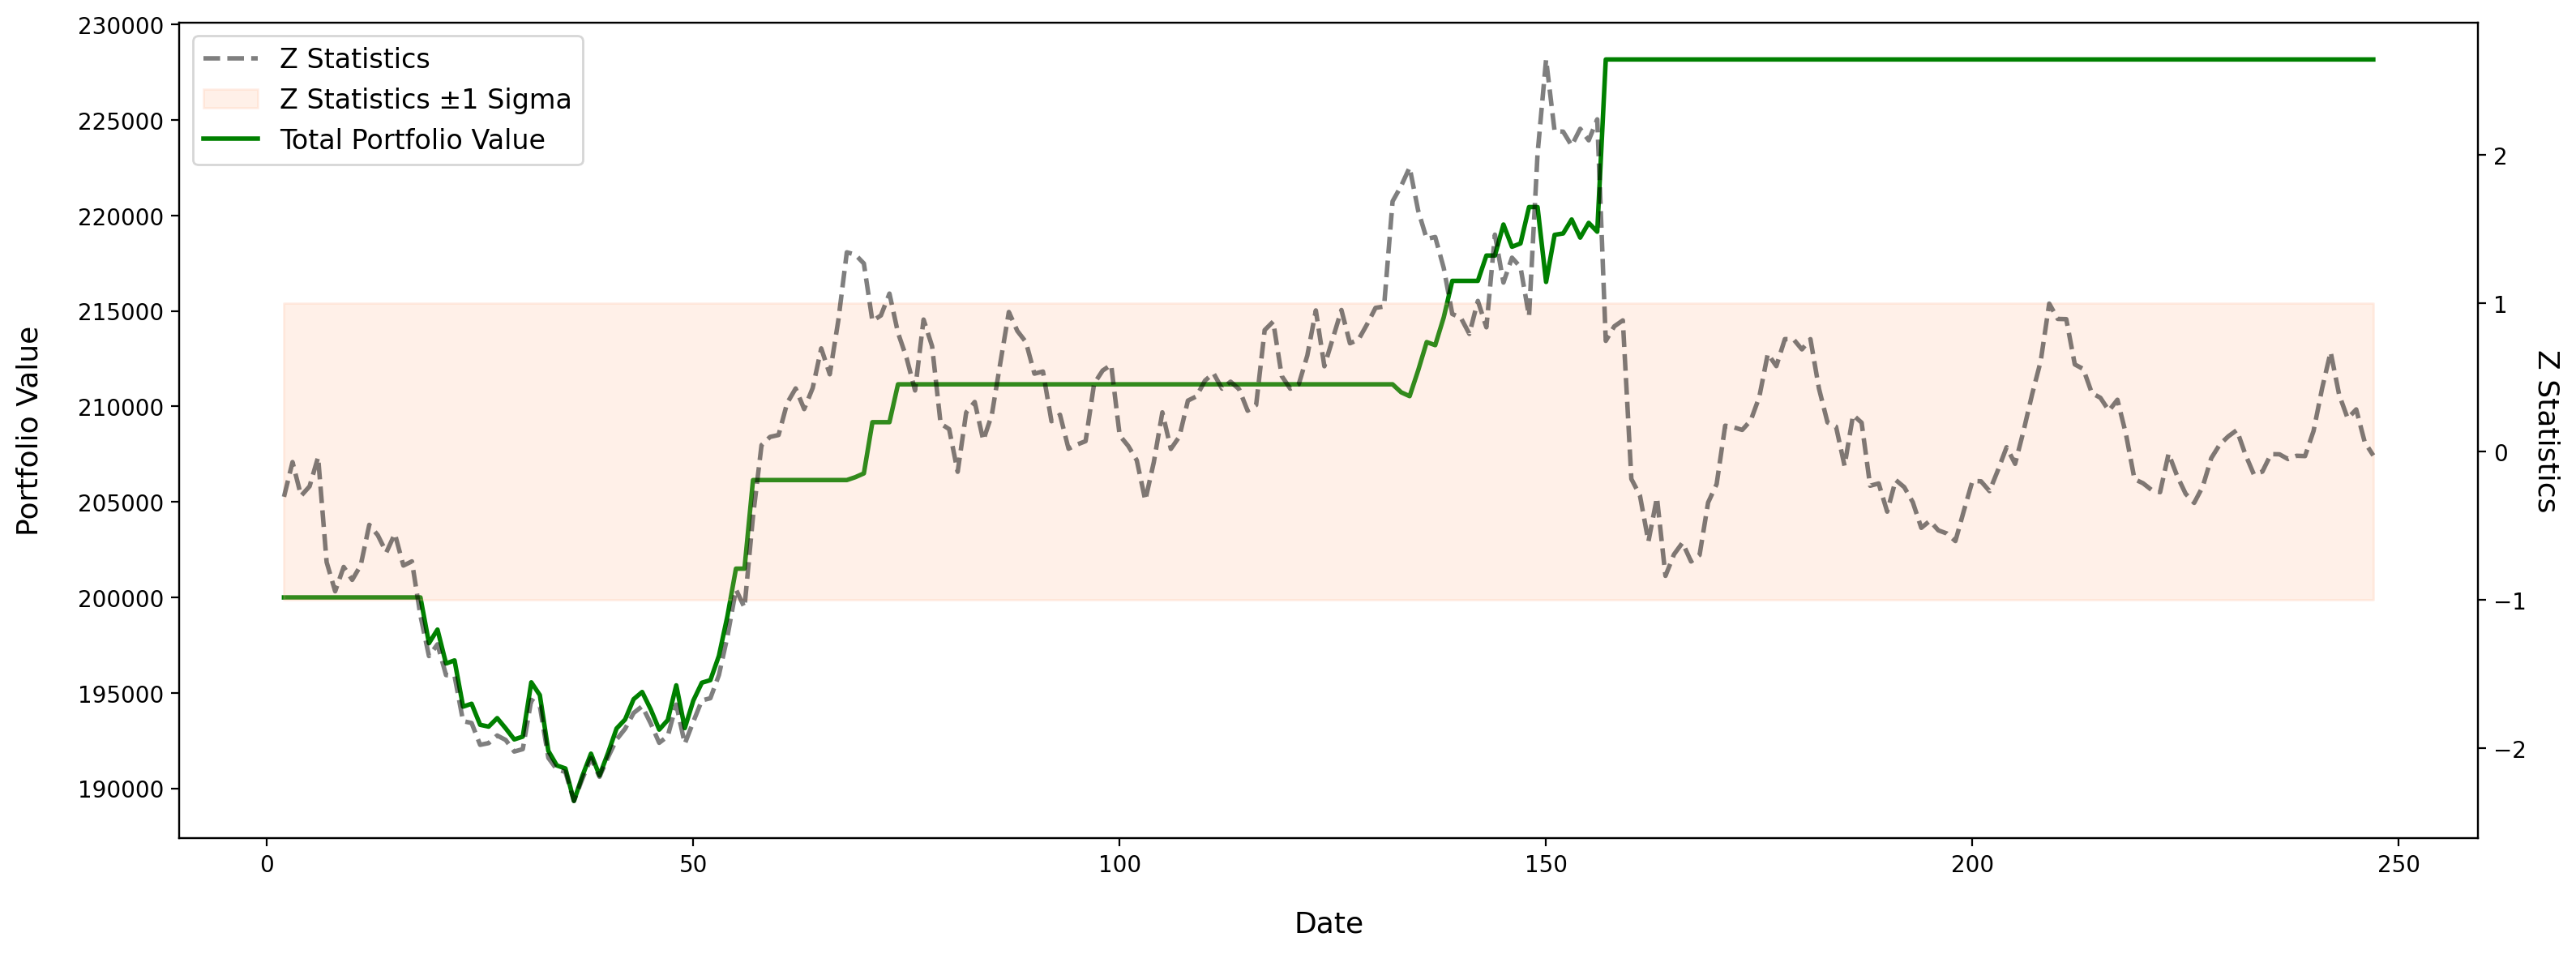

<Figure size 1200x700 with 0 Axes>

In [146]:
import matplotlib.pyplot as plt

# plot the asset value change of the portfolio and pnl along with z-score
fig = plt.figure(figsize=(16,6))  # Wider and cleaner
ax = fig.add_subplot(111)
ax2 = ax.twinx()

l1, = ax.plot(portfolio['total asset'], c='g', linewidth=2, linestyle='solid')

l2, = ax2.plot(portfolio['z'], c='black', alpha=0.5, linewidth=2, linestyle='dashed')

b = ax2.fill_between(portfolio.index,
                     portfolio['z upper limit'],
                     portfolio['z lower limit'],
                     alpha=0.2, color='#ffb48f')

# Axis labels and padding
ax.set_ylabel('Portfolio Value', fontsize=13)
ax2.set_ylabel('Z Statistics', rotation=270, fontsize=13)
ax.yaxis.labelpad = 15
ax2.yaxis.labelpad = 15
ax.set_xlabel('Date', fontsize=13)
ax.xaxis.labelpad = 15

plt.legend([l2, b, l1],
           ['Z Statistics', 'Z Statistics ±1 Sigma', 'Total Portfolio Value'],
           loc='upper left', fontsize=12)

plt.tight_layout()
plt.show()
plt.savefig('Portfolio Valuation', dpi=400)

In [147]:
# calculate final portfolio value
final_portfolio = portfolio['total asset'].iloc[-1]
print(final_portfolio)

228169.30727972


In [148]:
profit = final_portfolio - 2*initial_capital
print(profit)

28169.30727972


In [149]:
roi = (profit / (2*initial_capital))*100 # Overall ROI of the pair trading strategy
print(roi)

14.08465363986
